<a href="https://colab.research.google.com/github/wittyicon29/CV-using-Fashion-MNIST/blob/main/CV_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: 5

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  39  99  18   0   4   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26  95 118  87   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   2   0   2   0   8  97 124  95   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 

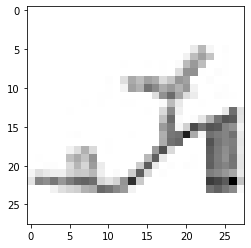

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#You can put between 9 to 59999 here
index = 576
#Set number of characters per row when printing
np.set_printoptions(linewidth=320)
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')
plt.imshow(train_images[index], cmap='Greys')

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation= tf.nn.softmax)])

In [ ]:
inputs = np.array([[1.0,5.0,6.0,2.0]],dtype=float)
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

predictions = np.argmax(outputs)
print(f'class with highest probability: {predictions}')

input to softmax function: [[1. 5. 6. 2.]]
output of softmax function: [[0.00483724 0.26410418 0.71790961 0.01314897]]
sum of outputs: 1.0000000000000002
class with highest probability: 2


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.2):
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4923 - accuracy: 0.8257
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3733 - accuracy: 0.8645
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3350 - accuracy: 0.8787
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3108 - accuracy: 0.8857
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8915
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2794 - accuracy: 0.8958
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2678 - accuracy: 0.9001
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2563 - accuracy: 0.9035
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2476 - accuracy: 0.9085
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2

In [ ]:
model.evaluate(test_images, test_labels, callbacks=[callbacks])

313/313 [==============================] - 1s 2ms/step - loss: 0.5103 - accuracy: 0.8882


[0.5103380084037781, 0.8881999850273132]